![logo](../files/misc/logo.png)
<h1 style="color:#872325">High Performance Python</h1>

In [1]:
import sys
sys.path.append("../utils")
import utils as u

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
x, labs, colors = u.make_training_data(1643, 200, 200)

In [4]:
def knn_perf(x0, X, labels, k=5, threshold=0, proba=False):
    """
    High Performance binary KNN classifier
    Compute the class of an ndarray using KNN.
    
    Parameters
    ---------
    x0: np.array of shape (n, 2) or (2, n, n)
        If of shape (n, 2). The entry is a matrix with n rows and 2 columns.
        If it is of shape (2, n, n) it represents a grid with x and y coordinates
    
    X: np.array of shape (m, 2)
        Represents the coordinates of the vector
    
    labels: np.array of shape (m, 1)
        The class of the elements
    """
    x0 = x0.reshape(2, -1, 1) if x0.ndim <= 2 else x0
    distances = ((X.T[:, np.newaxis, np.newaxis, :] - x0[..., np.newaxis]) ** 2).sum(axis=0)
    estimated = labs[np.argsort(distances, axis=-1)[:,:,:k]].mean(axis=2)[:, :, 0]
    
    if not proba:
        estimated[np.where(estimated > 0)] = 1
        estimated[np.where(estimated <= 0)] = -1
        estimated[np.where(estimated == 0)] = 0
    
    return estimated

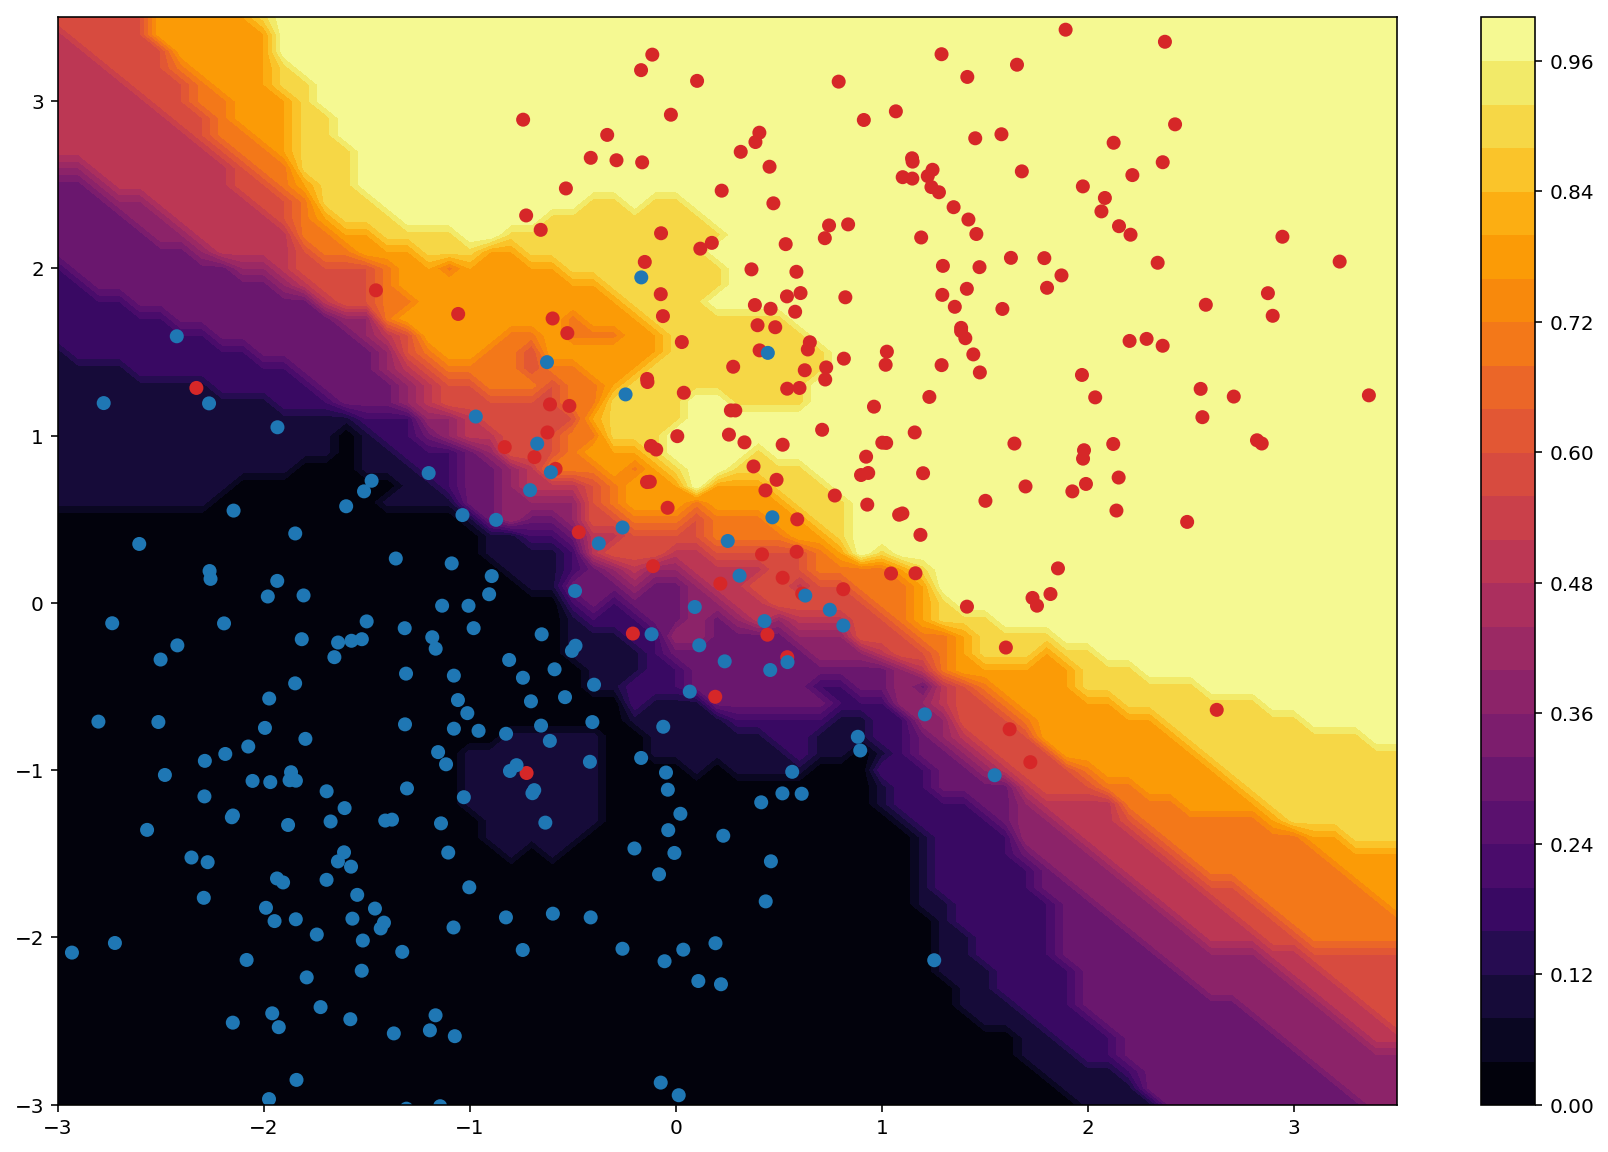

In [5]:
k = 10
xgrid = np.mgrid[-3:4:0.1, -3:4:0.1]

estimated = knn_perf(xgrid, x, labs, k=10, proba=True)

plt.figure(figsize=(15, 10))
plt.contourf(*xgrid, estimated, alpha=1, cmap="inferno", levels=30)
plt.colorbar()
plt.scatter(*x.T, c=colors)
plt.xlim(-3, 3.5); plt.ylim(-3, 3.5);